In [1]:
# jupyter notebook to run on google collab
# Will train a CNN model for quick doodles base on google quickdraw data set

In [2]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf 

In [3]:
# set up limited category list
categories = ['snake','bat','bird','camel','cat','cow','crab','dog','dragon','elephant','fish','frog','giraffe','horse','mouse','shark','apple','banana','grapes','pear','pineapple','strawberry','airplane','bicycle','bus','car','submarine','truck','van','sailboat','train']


In [4]:
!mkdir npy

In [5]:
cat_limit = categories[:30]
cat_limit

['snake',
 'bat',
 'bird',
 'camel',
 'cat',
 'cow',
 'crab',
 'dog',
 'dragon',
 'elephant',
 'fish',
 'frog',
 'giraffe',
 'horse',
 'mouse',
 'shark',
 'apple',
 'banana',
 'grapes',
 'pear',
 'pineapple',
 'strawberry',
 'airplane',
 'bicycle',
 'bus',
 'car',
 'submarine',
 'truck',
 'van',
 'sailboat']

In [7]:
# download npy data from google
import urllib.request
def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  counter = 1
  for i in cat_limit:
    space = i.replace('_', '%20')
    path = base+space+'.npy'
    print(f'{path} {counter}/{len(cat_limit)}')
    counter += 1
    urllib.request.urlretrieve(path, 'npy/'+i+'.npy')
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/snake.npy 1/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy 2/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy 3/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy 4/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy 5/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cow.npy 6/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/crab.npy 7/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy 8/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dragon.npy 9/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/elephant.npy 10/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fish.npy 11/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/frog.npy 12/30
https://storage.googl

In [8]:
all_files = glob.glob(os.path.join('npy', '*.npy'))

In [9]:
# load all files downlad in collab
# Join all of them in X and y
X = np.empty([0, 784])
y = np.empty([0])
async_categories = []

for idx, file in enumerate(all_files):
  data = np.load(file)
  data = data[0: 16000, :]
  labels = np.full(data.shape[0], idx)

  X = np.concatenate((X, data), axis=0)
  y = np.append(y, labels)
  
  category, extension = os.path.splitext(os.path.basename(file))
  async_categories.append(category)

banana


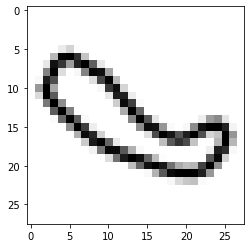

In [10]:
# Test a random image
import matplotlib.pyplot as plt
%matplotlib inline
testIndex=1000
plt.imshow(X[testIndex].reshape(28,28), cmap='binary')
print(async_categories[int(y[idx].item())])


In [11]:
async_categories

['banana',
 'shark',
 'truck',
 'bird',
 'cow',
 'dog',
 'horse',
 'elephant',
 'pineapple',
 'apple',
 'grapes',
 'strawberry',
 'bus',
 'crab',
 'camel',
 'giraffe',
 'snake',
 'car',
 'bat',
 'cat',
 'frog',
 'van',
 'mouse',
 'airplane',
 'fish',
 'sailboat',
 'dragon',
 'bicycle',
 'submarine',
 'pear']

In [12]:
# Scramble data a split data into test and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=24)

In [13]:
# Normalize to 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [14]:
# reshape input
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
X_train.shape[0]

384000

In [16]:
X_train.shape

(384000, 28, 28, 1)

In [17]:
# one hot encode y category
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(async_categories))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(async_categories))

In [18]:
print(f'{y_test.shape}.{y_train.shape}')
print(f'{X_test.shape},{X_train.shape}')
y_train.shape

(96000, 30).(384000, 30)
(96000, 28, 28, 1),(384000, 28, 28, 1)


(384000, 30)

In [19]:
# set up model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(async_categories), activation='softmax'))

# top_k=tf.keras.metrics.top_k_categorical_accuracy(k=3)
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy','top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          3

In [20]:
# train model
model.fit(x=X_train, y=y_train, batch_size=256, validation_split=0.1, verbose=2, epochs=8)

Epoch 1/8
1350/1350 - 25s - loss: 1.3262 - accuracy: 0.6128 - top_k_categorical_accuracy: 0.8714 - val_loss: 0.9574 - val_accuracy: 0.7172 - val_top_k_categorical_accuracy: 0.9324
Epoch 2/8
1350/1350 - 24s - loss: 0.8426 - accuracy: 0.7482 - top_k_categorical_accuracy: 0.9429 - val_loss: 0.7777 - val_accuracy: 0.7671 - val_top_k_categorical_accuracy: 0.9502
Epoch 3/8
1350/1350 - 24s - loss: 0.7279 - accuracy: 0.7802 - top_k_categorical_accuracy: 0.9539 - val_loss: 0.7176 - val_accuracy: 0.7846 - val_top_k_categorical_accuracy: 0.9550
Epoch 4/8
1350/1350 - 24s - loss: 0.6674 - accuracy: 0.7977 - top_k_categorical_accuracy: 0.9591 - val_loss: 0.6794 - val_accuracy: 0.7932 - val_top_k_categorical_accuracy: 0.9579
Epoch 5/8
1350/1350 - 24s - loss: 0.6274 - accuracy: 0.8095 - top_k_categorical_accuracy: 0.9622 - val_loss: 0.6642 - val_accuracy: 0.8001 - val_top_k_categorical_accuracy: 0.9584
Epoch 6/8
1350/1350 - 24s - loss: 0.5957 - accuracy: 0.8179 - top_k_categorical_accuracy: 0.9651 - v

In [21]:
# evaluate model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

3000/3000 [==============================] - 13s 4ms/step - loss: 0.6502 - accuracy: 0.8056 - top_k_categorical_accuracy: 0.9599
Test accuracy: 80.56%


In [22]:
# save and covert model with tensorflowjs
!pip install tensorflowjs

     |████████████████████████████████| 61kB 2.1MB/s 
     |████████████████████████████████| 144.4MB 106kB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
     |████████████████████████████████| 256kB 28.5MB/s 
     |████████████████████████████████| 921kB 39.4MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=868c4a7d643e52d74d6b321f81d89780d1acdd3971d26b0d8ae750ce63b3671e
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0

In [23]:
import json
with open('easyCategories.json', 'w') as outputFile:
  json.dump(async_categories, outputFile)

In [24]:
model.save('kerasEasy30.h5')

In [25]:
!mkdir model

In [26]:
!tensorflowjs_converter --input_format keras kerasEasy30.h5 model/

In [27]:
!cp easyCategories.json model/easyCategories.json

In [28]:
!zip -r modelEasy30.zip model

  adding: model/ (stored 0%)
  adding: model/easyCategories.json (deflated 46%)
  adding: model/group1-shard1of1.bin (deflated 7%)
  adding: model/model.json (deflated 87%)


In [29]:
from google.colab import files
files.download('modelEasy30.zip')

In [30]:
ones =np.ones([28,28])
ones=ones.reshape(1,28,28,1)
model.predict(ones)

array([[0.01077043, 0.00528294, 0.04222935, 0.00478502, 0.00784956,
        0.00446659, 0.00449696, 0.00616009, 0.01704045, 0.01679915,
        0.0974049 , 0.01264833, 0.07147704, 0.00620979, 0.00905091,
        0.01469143, 0.02118821, 0.06661358, 0.1192056 , 0.00950108,
        0.21063432, 0.13450639, 0.02310885, 0.01046708, 0.01300052,
        0.02887196, 0.0110563 , 0.00411573, 0.00579259, 0.01057484]],
      dtype=float32)

In [31]:
zeros =np.zeros([28,28])
zeros=zeros.reshape(1,28,28,1)
model.predict(zeros)

array([[0.0573484 , 0.02588618, 0.02773172, 0.04620425, 0.03585477,
        0.02180571, 0.02138193, 0.0371766 , 0.01935319, 0.01844175,
        0.03427422, 0.0282335 , 0.0128475 , 0.01713167, 0.0143264 ,
        0.01538852, 0.02042506, 0.02001949, 0.17796049, 0.0442769 ,
        0.03503576, 0.0316308 , 0.03587952, 0.03851935, 0.05847427,
        0.02127187, 0.01570784, 0.00945824, 0.02463738, 0.03331678]],
      dtype=float32)

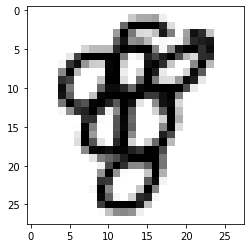

In [32]:
testI=25
plt.imshow(X_test[testI].reshape(28,28), cmap='binary')

In [33]:
prediction = model.predict(tf.expand_dims(tf.reshape(X_test[testI],[28,28,1]),0))
i=0
maxI = 0
max = prediction[0][0]
for i in range(len(prediction[0])):
  if (prediction[0][i]>max):
    max = prediction[0][i]
    maxI=i
  i+=1
print(async_categories[maxI])
# print(categories[y_test[150]])
print(max)
for ind in range(len(y_test[testI])):
  if y_test[testI][ind]==1:
    print(async_categories[ind])

grapes
0.9971733
grapes


In [36]:
convol1=model.layer[0]
convol1.get_weights()

[array([[[[-0.16053987, -0.01696151, -0.13195609, -0.1007449 ,
            0.04488418,  0.12038724, -0.05424661, -0.09064208,
            0.10231151,  0.06592949,  0.09882298, -0.31661108,
           -0.09143399,  0.15551819, -0.14046447,  0.15649532]],
 
         [[ 0.21475159, -0.11610334,  0.33608988, -0.08478241,
            0.1148032 ,  0.05999648,  0.14592205, -0.14693746,
            0.29830799,  0.07562134,  0.08061723,  0.16737232,
            0.07044883,  0.03287732, -0.2543688 ,  0.08179861]],
 
         [[-0.07714632,  0.13068104, -0.22261408,  0.14402829,
           -0.06249876,  0.0916011 ,  0.03560975, -0.24664691,
            0.14914635,  0.04527962, -0.10653634,  0.09615467,
            0.14309093, -0.21669047,  0.09087022, -0.13092278]]],
 
 
        [[[ 0.2075569 ,  0.13374732, -0.21564665, -0.14430381,
            0.12677598,  0.10928212,  0.01151757,  0.07105356,
           -0.34568447,  0.09585033, -0.15463929,  0.06031884,
           -0.21149297,  0.02783475, -0.

NameError: name 'model' is not defined